## Инициализация SparkContext

In [2]:
import pyspark

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [3]:
!hdfs dfsadmin -safemode leave

2023-12-07 20:02:39 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Safe mode is OFF


In [4]:
conf = SparkConf().set("spark.executor.instances", "2").set("spark.executor.cores", "1").set("spark.executor.memory", "1g")

In [5]:
sc = SparkContext(appName="Lazutin_spark", master="yarn")

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/07 20:02:53 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/07 20:02:55 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [6]:
sc

<SparkContext master=yarn appName=Lazutin_spark>

In [7]:
sc.stop()

## Инициализация SparkConnect

<li>скопирую датасет из локальной папки ml-latest-small в корень hdfs</li>

In [20]:
!hdfs dfs -put ../spark/ml-latest-small .

2023-12-07 16:30:11 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
!hdfs dfs -ls

2023-12-07 20:03:22 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 2 items
drwxr-xr-x   - root supergroup          0 2023-12-07 20:03 .sparkStaging
drwxr-xr-x   - root supergroup          0 2023-12-07 16:30 ml-latest-small


In [8]:
!hdfs dfs -ls ml-latest-small

2023-12-07 18:05:05 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Found 5 items
-rw-r--r--   3 root supergroup       8342 2023-12-07 16:30 ml-latest-small/README.txt
-rw-r--r--   3 root supergroup     197979 2023-12-07 16:30 ml-latest-small/links.csv
-rw-r--r--   3 root supergroup     494431 2023-12-07 16:30 ml-latest-small/movies.csv
-rw-r--r--   3 root supergroup    2483723 2023-12-07 16:30 ml-latest-small/ratings.csv
-rw-r--r--   3 root supergroup     118660 2023-12-07 16:30 ml-latest-small/tags.csv


In [9]:
spark = SparkSession.builder.master("yarn").appName("Lazutin_spark").getOrCreate()

23/12/07 20:03:27 WARN Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [19]:
%%time
ratings_df = spark.read.format("csv").option("header", "True").load("ml-latest-small/ratings.csv")

CPU times: user 3.24 ms, sys: 4.2 ms, total: 7.45 ms
Wall time: 194 ms


### еще один способ прочитать датасет

In [6]:
another_df = spark.read.csv("ml-latest-small/ratings.csv", header=True, inferSchema=True)
another_df.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [20]:
%%time
tags_df = spark.read.format("csv").option("header", "True").load("ml-latest-small/tags.csv")

CPU times: user 3.49 ms, sys: 2.23 ms, total: 5.72 ms
Wall time: 252 ms


### количество строк в датсете ratings

In [18]:
ratings_df.count()

100836

### количество строк в датсете tags

In [19]:
tags_df.count()

3683

### Количество job в SparkUI
<b>Суммарно 12 джоб,</b>
<li>0-3 - подгрузка датасета </li>
<li>4-5 - подгрузка датасета </li>
<li>6 - результат вывода командой show</li>
<li>7-8 - подгрузка датасета </li>
<li>10-12 - вывод на количество строчек в датасете </li>
<li>На одну джобу приходилась одна stage, на одну stage приходится одна таска</li>

![sparkUI jobs.png](<attachment:sparkUI jobs.png>)
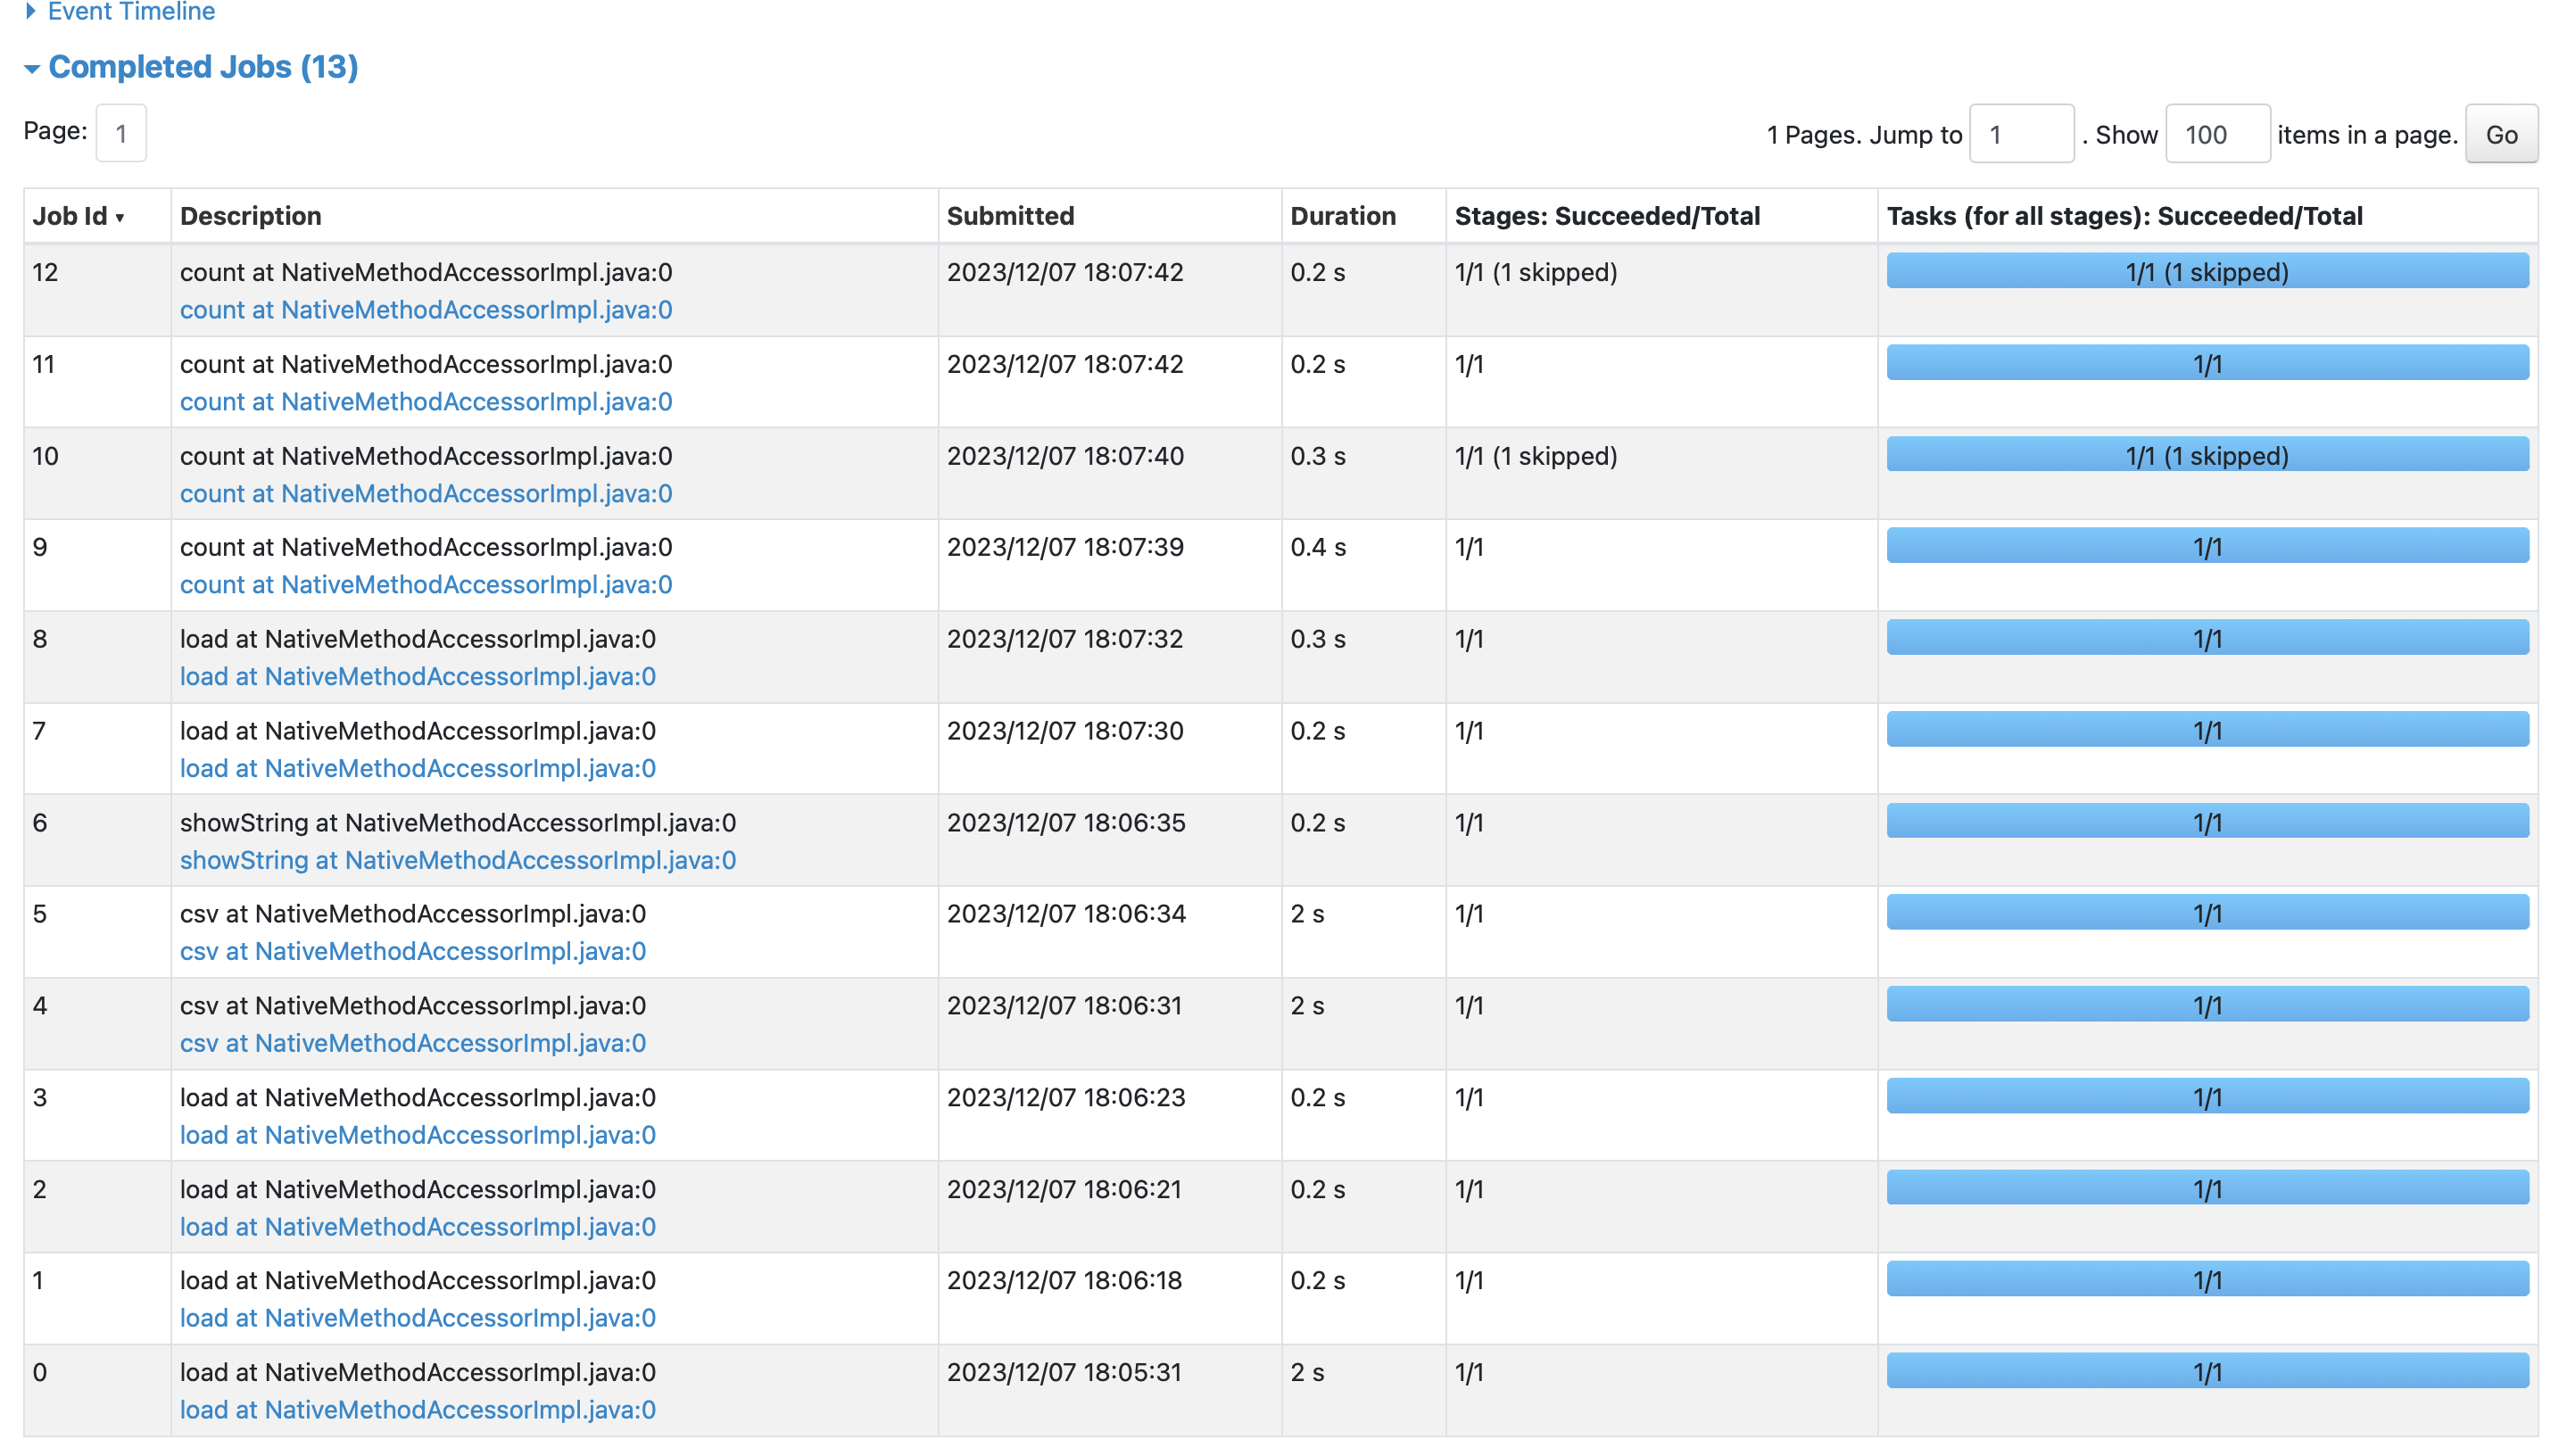

### запущенный SparkApp в RM

![Screenshot 2023-12-07 at 21.09.26.png](<attachment:Screenshot 2023-12-07 at 21.09.26.png>)
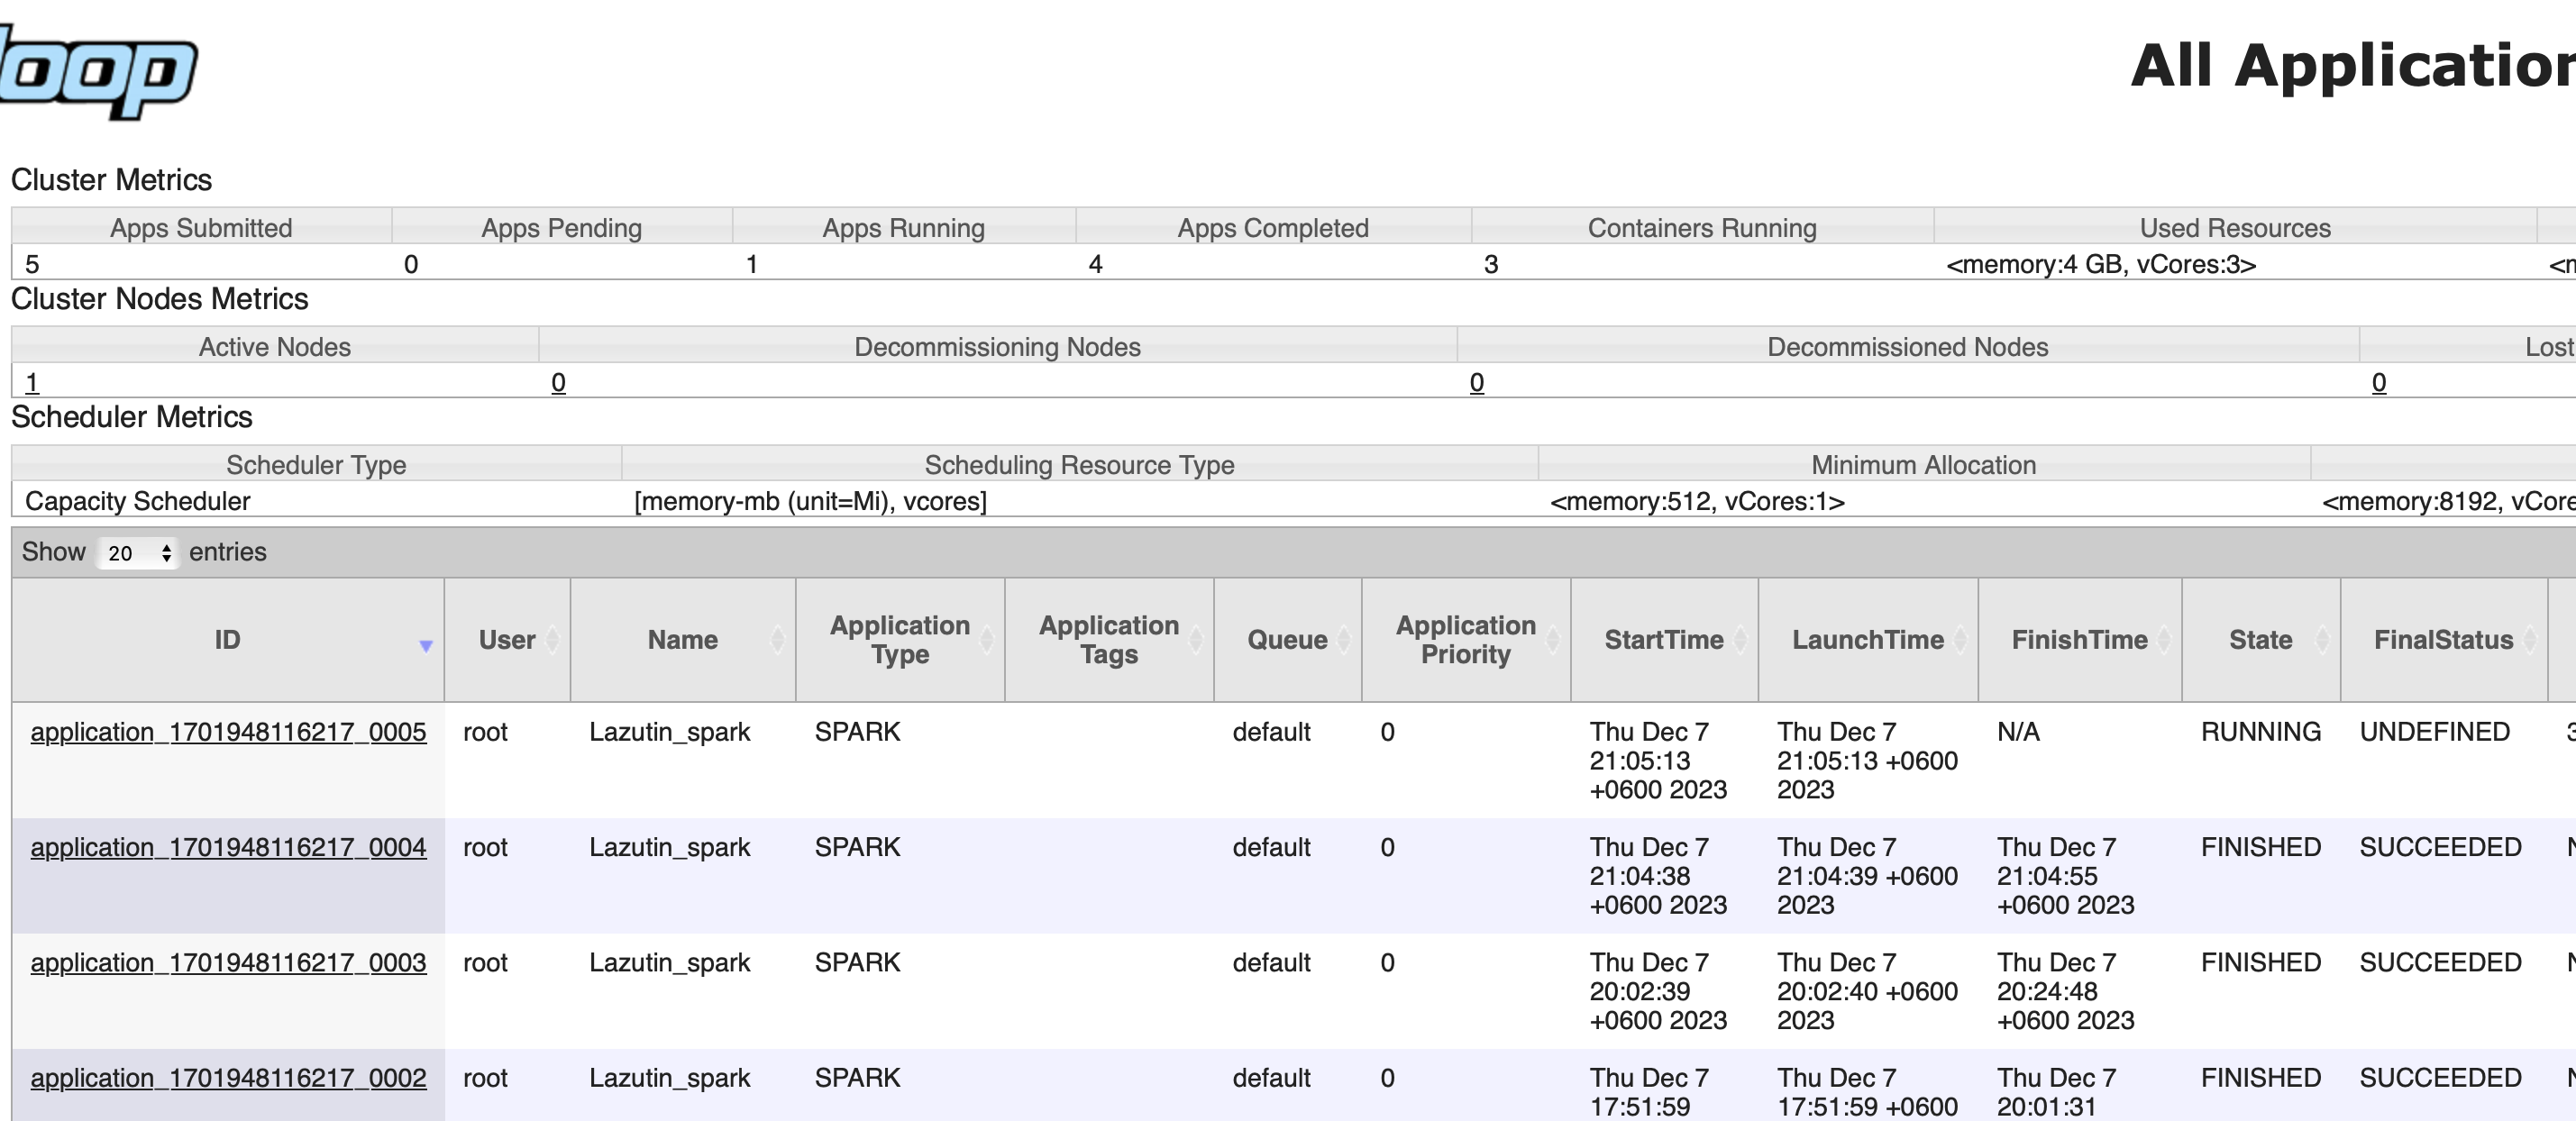

### Блок 2

In [27]:
ratings_df.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



### Посчитать количество уникальных фильмов и уникальных юзеров в таблице “ratings”.

In [8]:
unique_movie = spark.read.format("csv").option("header", "True").load("ml-latest-small/ratings.csv").select("movieId").distinct().count()

In [9]:
unique_movie

9724

In [21]:
unique_users = ratings_df.select("userId").distinct().count()
unique_users

610

### Посчитать, сколько было поставлено оценок >= 4.0. (5 баллов)

In [27]:
marks_above4 = ratings_df.select("rating").filter("rating >= 4.0").count()
marks_above4

48580

### top 100 movies

In [38]:
top_100_movies = ratings_df.select("movieId").sort("rating").limit(100)
top_100_movies.show()

ERROR:root:Exception while sending command.                         (0 + 1) / 1]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: An error occurred while calling o215.showString

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
